# K-Mean Clustering using sklearn 

In [0]:
from sklearn.datasets.samples_generator import make_classification

 # Generate random data with two features and one cluster/target label 

X, y = make_classification(n_samples=200, n_features=2, n_classes=3, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=0)

X,y

 

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Creating a Dataframe from the generated data 

In [0]:
df = pd.DataFrame(X)
df['y']= y



df.columns = ['X1', 'X2', 'Y']
df

### Create DataFrame without the cluster column

In [0]:
df1 = df.drop(['Y'], axis=1)
df1

,X1,X2
0,1.201204,2.685858
1,-0.475656,1.278883
2,1.854452,0.021771
3,0.126927,0.024181
4,-0.988873,0.788911
...,...,...
195,0.020843,1.029939
196,0.662639,-1.150929
197,2.077741,-1.610384
198,-1.710734,0.684729


### Having a feel of the data by visualising it oon a scatter plot

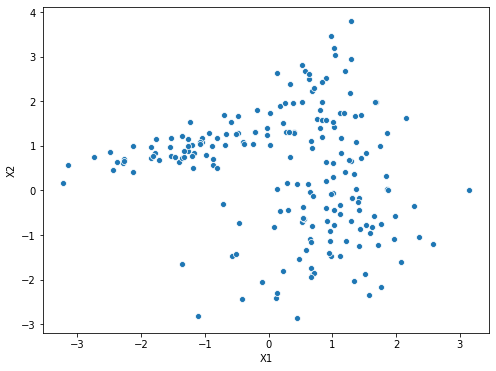

In [0]:
fig, ax=plt.subplots(figsize = (8,6))
ax = sns.scatterplot(x= 'X1', y= 'X2', data=df)

### Building and testing the K Mean Model

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Inertia value
KModel = kmeans.fit(df1)
KModel.inertia_

187.91367060704124

### Predicted clustering from KMean Model

In [0]:
KModel.labels_

array([1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0], dtype=int32)

In [0]:
# Checking the performance of the Model

pd.crosstab(df.Y, KModel.labels_)

col_0,0,1,2
Y,,,
0,55,11,0
1,0,51,17
2,1,1,64


In [0]:
Y_train = KModel.labels_
df['Y_train'] = Y_train
df

,X1,X2,Y,Y_train
0,1.201204,2.685858,1,1
1,-0.475656,1.278883,0,0
2,1.854452,0.021771,2,2
3,0.126927,0.024181,2,2
4,-0.988873,0.788911,0,0
...,...,...,...,...
195,0.020843,1.029939,0,1
196,0.662639,-1.150929,2,2
197,2.077741,-1.610384,2,2
198,-1.710734,0.684729,0,0


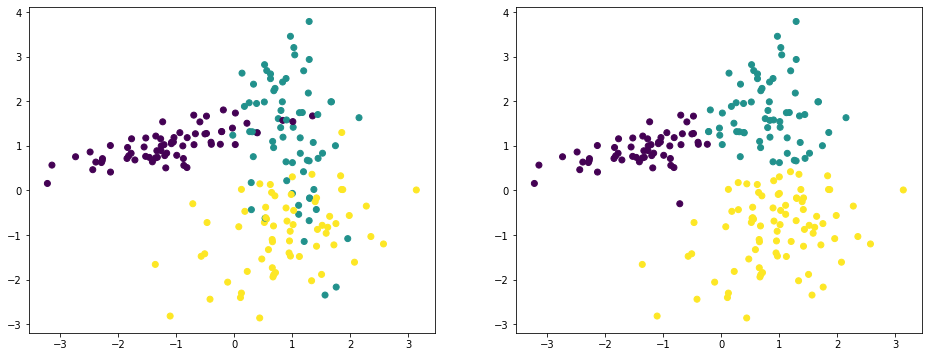

In [0]:
# Two plots showing the actual and modelled clustering labels
# Model not too bad!!!

fig, (ax,bx)= plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax.scatter(df["X1"], df["X2"], c=df["Y"])
bx.scatter(df["X1"], df["X2"], c=df["Y_train"]);